In [1]:
import pandas as pd
import itertools
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import seaborn as sns

## 1.Start New

In [2]:
df=pd.read_csv('malicious_phish.csv')

print(df.shape)
df.head()

(651191, 2)


,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement


In [3]:
df.type.value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [4]:
df_phish = df[df.type=='phishing']
df_malware = df[df.type=='malware']
df_deface = df[df.type=='defacement']
df_benign = df[df.type=='benign']


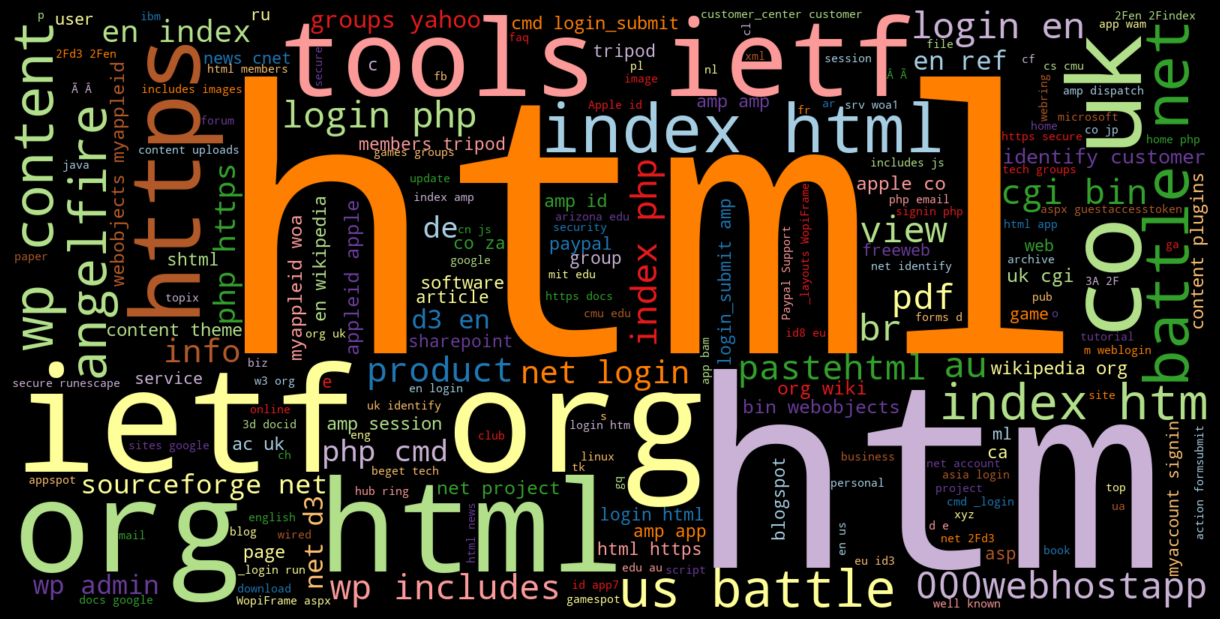

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
phish_url = " ".join(i for i in df_phish.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(phish_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [8]:
!pip install wordcloud

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 262.6 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 363.1 kB/s eta 0:00:01
   -------------------- ----------------- 163.8/300.2 kB 756.6 kB/s eta 0:00:01
   ------------------------------------ --- 276.5/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 1.1 MB/s eta 0:00:00


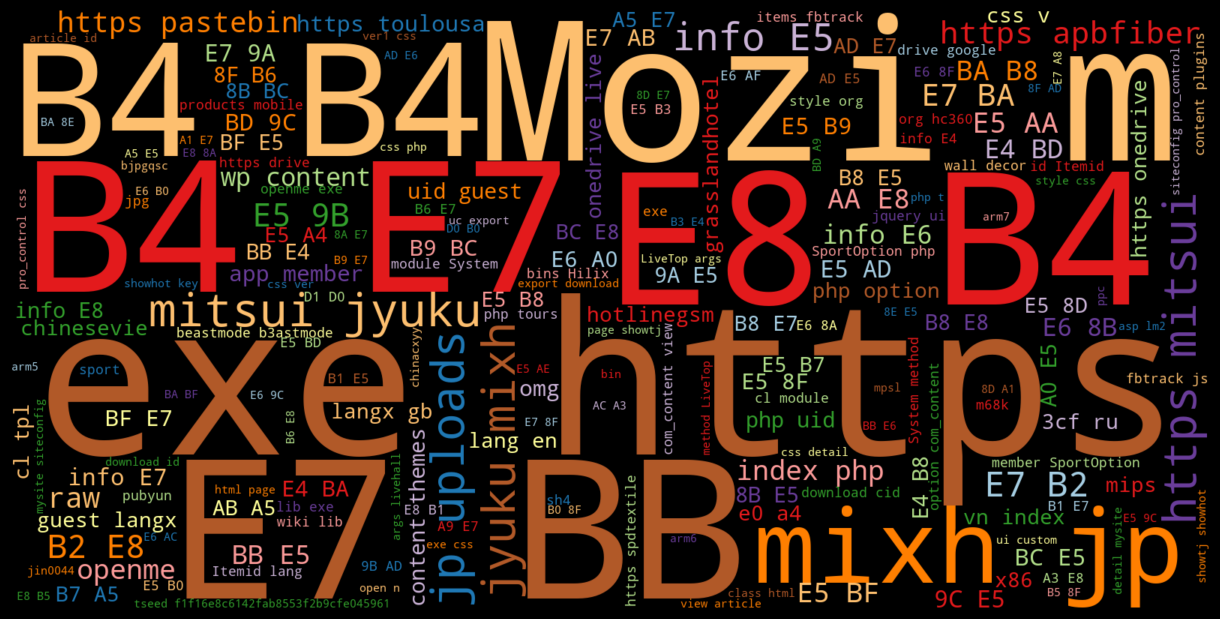

In [12]:
malware_url = " ".join(i for i in df_malware.url)
wordcloud = WordCloud(width=1600, height=800,colormap='Paired').generate(malware_url)
plt.figure( figsize=(12,14),facecolor='k')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Feature Extraction

### 1.Ip have or not

In [4]:
import re
#Use of IP or not in domain
def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}', url)  # Ipv6
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['use_of_ip'] = df['url'].apply(lambda i: having_ip_address(i))

### 2.Dot counting of Url

In [5]:
def count_dot(url):
    count_dot = url.count('.')
    return count_dot

df['count_dot'] = df['url'].apply(lambda i: count_dot(i))
df.head()

,url,type,use_of_ip,count_dot
0,br-icloud.com.br,phishing,0,2
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2


In [63]:
#df.drop('count.',axis=1,inplace=True)

### 3.count of www

In [6]:
def count_www(url):
    url.count('www')
    return url.count('www')

df['count-www'] = df['url'].apply(lambda i: count_www(i))

### 4.count of directory

In [7]:
from urllib.parse import urlparse
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

df['count_dir'] = df['url'].apply(lambda i: no_of_dir(i))

In [8]:
df


,url,type,use_of_ip,count_dot,count-www,count_dir
0,br-icloud.com.br,phishing,0,2,0,0
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,0,2
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,0,3
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,0,1
...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,3,0,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,2,0,4
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,2,1,4
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,2,0,2


### 5.Abnormal url or not

In [9]:
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))

### 6.checking url shortening is used or not

In [10]:
def shortening_service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
    
    
df['short_url'] = df['url'].apply(lambda i: shortening_service(i))

### 7.Length of url

In [12]:
def url_length(url):
    return len(str(url))


#Length of URL
df['url_length'] = df['url'].apply(lambda i: url_length(i))

In [13]:
df

,url,type,use_of_ip,count_dot,count-www,count_dir,abnormal_url,short_url,url_length
0,br-icloud.com.br,phishing,0,2,0,0,0,0,16
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,0,2,0,0,35
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,0,3,0,0,31
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,1,1,1,0,88
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,0,1,1,0,235
...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,3,0,3,0,0,39
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,2,0,4,0,1,44
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,2,1,4,0,1,42
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,2,0,2,0,0,45


### 8.http or https have or not

In [14]:
def count_https(url):
    return url.count('https')

df['count-https'] = df['url'].apply(lambda i : count_https(i))

def count_http(url):
    return url.count('http')

df['count-http'] = df['url'].apply(lambda i : count_http(i))

## 9. count letters

In [99]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters


df['count-letters']= df['url'].apply(lambda i: letter_count(i))

In [100]:
df

,url,type,use_of_ip,count_dot,count-www,count_dir,abnormal_url,short_url,url_length,count-https,count-http,type_code,count-letters
0,br-icloud.com.br,phishing,0,2,0,0,0,0,16,0,0,3,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,0,2,0,0,35,0,0,0,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,0,3,0,0,31,0,0,0,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,1,1,1,0,88,0,1,1,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,0,1,1,0,235,0,1,1,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,3,0,3,0,0,39,0,0,3,21
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,2,0,4,0,1,44,0,0,3,29
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,2,1,4,0,1,42,0,0,3,33
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,2,0,2,0,0,45,0,0,3,36


## Encoding the Type

In [101]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["type_code"] = lb_make.fit_transform(df["type"])
df["type_code"].value_counts()



type_code
0    428103
1     96457
3     94111
2     32520
Name: count, dtype: int64

In [102]:
df

,url,type,use_of_ip,count_dot,count-www,count_dir,abnormal_url,short_url,url_length,count-https,count-http,type_code,count-letters
0,br-icloud.com.br,phishing,0,2,0,0,0,0,16,0,0,3,13
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,0,2,0,0,35,0,0,0,29
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,0,3,0,0,31,0,0,0,25
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,1,1,1,0,88,0,1,1,63
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,0,1,1,0,235,0,1,1,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,3,0,3,0,0,39,0,0,3,21
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,2,0,4,0,1,44,0,0,3,29
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,2,1,4,0,1,42,0,0,3,33
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,2,0,2,0,0,45,0,0,3,36


In [103]:
lb_make.classes_[1]

'defacement'

In [104]:
df.columns

Index(['url', 'type', 'use_of_ip', 'count_dot', 'count-www', 'count_dir',
       'abnormal_url', 'short_url', 'url_length', 'count-https', 'count-http',
       'type_code', 'count-letters'],
      dtype='object')

In [123]:
X = df[['use_of_ip', 'count_dot', 'count-www', 'count_dir',
       'abnormal_url', 'short_url', 'url_length', 'count-https', 'count-http','count-letters']]


In [124]:
X

,use_of_ip,count_dot,count-www,count_dir,abnormal_url,short_url,url_length,count-https,count-http,count-letters
0,0,2,0,0,0,0,16,0,0,13
1,0,2,0,2,0,0,35,0,0,29
2,0,2,0,3,0,0,31,0,0,25
3,0,3,1,1,1,0,88,0,1,63
4,0,2,0,1,1,0,235,0,1,199
...,...,...,...,...,...,...,...,...,...,...
651186,0,3,0,3,0,0,39,0,0,21
651187,0,2,0,4,0,1,44,0,0,29
651188,0,2,1,4,0,1,42,0,0,33
651189,0,2,0,2,0,0,45,0,0,36


In [106]:
y = df['type_code']

In [107]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2,shuffle=True, random_state=42)

In [126]:
y_test

47517     0
29515     0
133216    0
380059    0
481883    0
         ..
539054    2
86027     0
396347    0
367641    1
505639    0
Name: type_code, Length: 130239, dtype: int32

In [127]:
from sklearn.preprocessing import StandardScaler

In [128]:
sd=StandardScaler()
X_train=sd.fit_transform(X_train)
X_test=sd.transform(X_test)

In [129]:
X_test

array([[-0.10648617, -0.13165966, -0.48528906, ..., -0.15931047,
        -0.63096736, -0.16712233],
       [-0.10648617, -0.13165966, -0.48528906, ..., -0.15931047,
        -0.63096736, -0.29333704],
       [-0.10648617, -0.80250298, -0.48528906, ..., -0.15931047,
        -0.63096736, -0.89285688],
       ...,
       [-0.10648617,  0.53918366, -0.48528906, ..., -0.15931047,
        -0.63096736, -0.29333704],
       [-0.10648617,  0.53918366,  1.99659648, ..., -0.15931047,
         1.49292181,  0.8425953 ],
       [-0.10648617, -0.80250298, -0.48528906, ..., -0.15931047,
        -0.63096736,  0.68482692]])

In [130]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=150,max_features='sqrt')
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test,y_pred_rf,target_names=['benign', 'defacement','phishing','malware']))


              precision    recall  f1-score   support

      benign       0.96      0.98      0.97     85621
  defacement       0.92      0.95      0.94     19292
    phishing       0.95      0.89      0.92      6504
     malware       0.87      0.79      0.83     18822

    accuracy                           0.94    130239
   macro avg       0.93      0.90      0.91    130239
weighted avg       0.94      0.94      0.94    130239



In [131]:
from sklearn.metrics import accuracy_score

In [132]:
score = accuracy_score(y_test, y_pred_rf)*100
print("accuracy:   %0.3f" % score)

accuracy:   94.379


In [133]:
def main(url):
    
    status = []
    
    status.append(having_ip_address(url))
    status.append(abnormal_url(url))
    status.append(count_dot(url))
    status.append(count_www(url))
    status.append(no_of_dir(url))
    status.append(shortening_service(url))
    status.append(count_https(url))
    status.append(count_http(url))
    status.append(url_length(url))
    status.append(letter_count(url))
    
    
    

    return status

In [134]:
def get_prediction_from_url(test_url):
    features_test = main(test_url)
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
    features_test = np.array(features_test).reshape((1, -1))

    features_test=sd.transform(features_test)
    
    pred = rf.predict(features_test)
    if int(pred[0]) == 0:
        
        res="SAFE"
        return res
    elif int(pred[0]) == 1:
        
        res="DEFACEMENT"
        return res
    elif int(pred[0]) == 2:
        res="MALWARE"
        return res
        
    elif int(pred[0]) == 3:
        
        res="phishing"
        return res

In [164]:
urls = ['http://www.authentisch-beraten.de/portfolio']
for url in urls:
     print(get_prediction_from_url(url))

phishing


C:\Users\PRIYABRATA\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [150]:
main('https://en.wikipedia.org')

[0, 1, 2, 0, 0, 0, 1, 1, 24, 19]

In [55]:
main('www.google.com')

[0, 0, 2, 1, 0, 0, 0, 0, 14]

In [54]:
lb_make.transform(['benign', 'defacement', 'malware', 'phishing'])



array([0, 1, 2, 3])

In [83]:
import pickle

In [165]:
pickle.dump(rf,open("Random_forestforPhising.pkl",'wb'))

In [166]:
pickle.dump(lb_make,open("Labelencoderfor_phising.pkl",'wb'))

In [167]:
pickle.dump(sd,open("standardscalerfor_phising.pkl",'wb'))

In [53]:
!scikit-learn --version

'scikit-learn' is not recognized as an internal or external command,
operable program or batch file.


In [97]:
!python -m pip show scikit-learn

Name: scikit-learn
Version: 1.4.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: C:\Users\PRIYABRATA\anaconda3\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: daal4py, dtreeviz, imbalanced-learn, scikit-learn-intelex


In [107]:
!pip install -U scikit-learn==1.3.2

  Obtaining dependency information for scikit-learn==1.3.2 from https://files.pythonhosted.org/packages/4e/ba/ce9bd1cd4953336a0e213b29cb80bb11816f2a93de8c99f88ef0b446ad0c/scikit_learn-1.3.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.2 MB 330.3 kB/s eta 0:00:28
   ---------------------------------------- 0.0/9.2 MB 330.3 kB/s eta 0:00:28
   ---------------------------------------- 0.0/9.2 MB 330.3 kB/s eta 0:00:28
   ---------------------------------------- 0.1/9.2 MB 292.6 kB/s eta 0:00:32
   ---------------------------------------- 0.1/9.2 MB 292.6 kB/s eta 0:00:32
    --------------------------------------- 0.2/9.2 MB 612.6 kB/s eta 0:00:15
    --------------------------------------- 0.2/9.2 MB 612.6 kB/s eta 0:00:15
   - -------------------------------------- 0.3/9.2 MB 776.2 kB/s eta 0:00:12
   - --------

In [161]:
df2=df.sample(10)

In [162]:
df2['url']

133372                       en.wikipedia.org/wiki/Beaubien
595199                        www.dzjhg.info/page/index.php
34004                                studioservices.go.com/
424819          http://www.authentisch-beraten.de/portfolio
32137     famouswhy.com/List/c/Female_pornographic_film_...
498887                          gailsez.org/tag/kellyn-uhl/
30909     waymarking.com/waymarks/WM7E49_Mountain_View_C...
7018                      linkedin.com/pub/dir/will/metzger
109865      http://www.eltech.nl/relaties/onze-leveranciers
549808    https://mitsui-jyuku.mixh.jp/uploads/41513687e...
Name: url, dtype: object

In [163]:
df2['type']

133372        benign
595199        benign
34004         benign
424819    defacement
32137         benign
498887        benign
30909         benign
7018          benign
109865    defacement
549808       malware
Name: type, dtype: object

In [130]:
df

,url,type,use_of_ip,count_dot,count-www,count_dir,abnormal_url,short_url,url_length,count-https,count-http,type_code
0,br-icloud.com.br,phishing,0,2,0,0,0,0,16,0,0,3
1,mp3raid.com/music/krizz_kaliko.html,benign,0,2,0,2,0,0,35,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,benign,0,2,0,3,0,0,31,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,defacement,0,3,1,1,1,0,88,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,defacement,0,2,0,1,1,0,235,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing,0,3,0,3,0,0,39,0,0,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing,0,2,0,4,0,1,44,0,0,3
651188,www.gamespot.com/xbox360/action/deadspace/,phishing,0,2,1,4,0,1,42,0,0,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing,0,2,0,2,0,0,45,0,0,3


In [131]:
from sklearn.linear_model import LogisticRegression

In [132]:
lr=LogisticRegression()

In [49]:
print(get_prediction_from_url('xbox360.ign.com/objects/850/850402.html'))

[3]
None


In [47]:
features_test = main('br-icloud.com.br')
    # Due to updates to scikit-learn, we now need a 2D array as a parameter to the predict function.
features_test = np.array(features_test).reshape((1, -1))

    #features_test=sd.transform(features_test)
    
pred = rf.predict(features_test)

In [48]:
pred[0]

0

In [170]:
lb_make.classes_[0]

'benign'